In [1]:
from turtle import position
import pyfolio as pf
# This is a sample Python script.
from datetime import datetime
import time

# from src.pairs.pairs_strategy import TradingPair
import yfinance as yf

from src.pairs.pair_strategy import PairStrategy
from src.pairs.coint_functions import *

from src.pairs.portfolio import Portfolio


from src.util.DataFetcher import *

import pandas as pd
import statsmodels.api as sm

from statsmodels.tools.tools import add_constant

import numpy as np


def calculate_daily_returns(asset):
    return asset.pct_change()


def compute_strategy_returns(positions, asset1, asset2, beta):
    asset1_returns = calculate_daily_returns(asset1)
    asset2_returns = calculate_daily_returns(asset2)

        # Print the head of the daily returns DataFrame
    print("Daily returns 1 head:\n", asset1_returns.head())
        # Print the head of the daily returns DataFrame
    print("Daily returns 2 head:\n", asset2_returns.head())

    # Ensure 'Date' is already a datetime column in both asset returns DataFrames
    asset1_returns['Date'] = pd.to_datetime(asset1_returns['Date'], format='%Y-%m-%d')
    asset2_returns['Date'] = pd.to_datetime(asset2_returns['Date'], format='%Y-%m-%d')



    # Set 'Date' as the index
    asset1_returns.set_index('Date', inplace=True)
    asset2_returns.set_index('Date', inplace=True)

    # Align positions with the asset returns based on the index
    positions = positions.reindex(asset1_returns.index).fillna(method='ffill')

    # Calculate the spread return
    spread_return = asset1_returns['Returns'] - beta * asset2_returns['Returns']

    # Calculate daily returns
    daily_returns = positions.shift(1) * spread_return

    # Print the head of the daily returns DataFrame
    print("Daily returns head:\n", daily_returns.head())

    return daily_returns


def spread_zscore(spread, mean=None, sigma=None):
    if (mean != None and sigma != None):
        return (spread - mean) / sigma
    else:
        return (spread - spread.mean()) / np.std(spread)
    


# def compute_strategy_returns(positions, asset1, asset2, beta):
#     # Calculate daily returns for each asset
#     asset1_returns = calculate_daily_returns(asset1)
#     asset2_returns = calculate_daily_returns(asset2)
#     # # Diagnostic print statements
#     # print("Positions head:\n", positions.head())
#     # print("Asset1 returns head:\n", asset1_returns.head())
#     # print("Asset2 returns head:\n", asset2_returns.head())

#     # Calculate daily strategy returns
#     strategy_returns = positions.shift(1) * pd.concat([asset1_returns, asset2_returns], axis=1)
#     daily_returns = strategy_returns.sum(axis=1)

#     spread_return = asset1_returns - beta * asset2_returns


    
#     # Apply the signals to the returns
#     # Multiply the returns by the signals to get the strategy's returns
#     daily_returns= position.shift(1) * spread_return + 0

#     daily_returns['Date'] = pd.to_datetime(daily_returns['Date'], format='%Y-%m-%d')
#     # Now set the 'Date' column as the index of the DataFrame
#     daily_returns.set_index('Date', inplace=True)
#     # # More diagnostic print statements
#     # print("Strategy returns head:\n", strategy_returns.head())
#     print("Daily returns head:\n", daily_returns.head())
# #     daily_returns['date_column'] = pd.to_datetime(daily_returns['Date'], errors='coerce')  # Convert to datetime, coerce errors to NaT

# # Option 1: Fill NaT with a placeholder date (e.g., the earliest date in your series)
# # placeholder_date = df['date_column'].min()
# # df['date_column'].fillna(placeholder_date, inplace=True)

#     # Option 2: Drop rows with NaT values
#     daily_returns.dropna(subset=['date_column'], inplace=True)


    # # More diagnostic print statements
    # print("Strategy returns head:\n", strategy_returns.head())
    print("Daily returns head:\n", daily_returns.head())
    return daily_returns

/Users/georgelyons/PycharmProjects/CQF/PairsTrading/venv/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/georgelyons/PycharmProjects/CQF/PairsTrading/venv/lib/python3.9/site-packages/pyfolio/pos.py:25: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
# Environment info:
!pip freeze

appdirs==1.4.4
appnope==0.1.3
asttokens==2.4.1
beautifulsoup4==4.12.2
Bottleneck==1.3.7
certifi==2023.11.17
charset-normalizer==3.3.2
comm==0.2.1
contourpy==1.2.0
cycler==0.12.1
DateTime==5.4
debugpy==1.8.0
decorator==5.1.1
empyrical-reloaded==0.5.9
exceptiongroup==1.2.0
executing==2.0.1
fonttools==4.47.0
frozendict==2.4.0
html5lib==1.1
hurst==0.0.5
idna==3.6
importlib-metadata==7.0.1
importlib-resources==6.1.1
investpy==1.0.8
ipykernel==6.28.0
ipython==8.18.1
jedi==0.19.1
joblib==1.3.2
jupyter_client==8.6.0
jupyter_core==5.7.1
kiwisolver==1.4.5
lxml==5.1.0
matplotlib==3.8.2
matplotlib-inline==0.1.6
multitasking==0.0.11
nest-asyncio==1.5.8
numpy==1.26.3
packaging==23.2
pandas==2.1.4
pandas-datareader==0.10.0
parso==0.8.3
patsy==0.5.6
peewee==3.17.0
pexpect==4.9.0
pf==0.1.1
pillow==10.2.0
platformdirs==4.1.0
prompt-toolkit==3.0.43
psutil==5.9.7
ptyprocess==0.7.0
pure-eval==0.2.2
pyfolio-reloaded==0.9.5
Pygments==2.17.2
pykalman==0.9.5
pyparsing==3.1.1
python-dateutil==2.8.2
pytz==2023.3

In [2]:
# tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT", "GS", "XOM", "META", "BRK-B", "MSFT", "QQQ"]
tickers = ["BTC-USD", "ETH-USD"]

# tickers = ["MSFT", "QQQ"]

start_date = datetime(2017, 1, 1)
end_date = datetime(2024, 1, 27)
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)

tickData.head(100)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,BTC-USD,ETH-USD
Date,,
2017-01-01,998.325012,NaN
2017-01-02,1021.750000,NaN
2017-01-03,1043.839966,NaN
2017-01-04,1154.729980,NaN
2017-01-05,1013.380005,NaN
2017-01-06,902.200989,NaN
2017-01-07,908.585022,NaN
2017-01-08,911.198975,NaN
2017-01-09,902.828003,NaN


In [34]:
tickersEq = ["QQQ", "MSFT", "SPY"]
# benchmark = ["BTC-USD"]

# tickers = ["MSFT", "QQQ"]

start_date = datetime(2017, 1, 1)
end_date = datetime(2024, 1, 27)
tickDataEq = get_all_adjusted_close_data(start_date, end_date, tickers)

# pair = PairStrategy(tickData['BTC-USD'],tickData['ETH-USD'],'2018-01-05','2019-01-04','2018-01-05','2019-01-04')
#incorp 
pair = PairStrategy(tickDataEq['SPY'], tickDataEq['QQQ'],tickDataEq['MSFT'],start_full='2018-01-05',end_full='2019-01-04',start_train='2018-01-05',end_train='2018-10-04', tau_denom=252, trading_fee=0.002)


print(pair.is_valid_pair)
val = pair.run_strategy(z=1.0)
# pair.plot_pair(pair.results)
# pair.plot_results()
# pair.plot_drawdown()

# print(val)

results = pair.results



# results.head(100)

# #with fees
strategy_returns_series = results['net_strategy_returns']

strategy_returns_series

# strategy_returns_series.head(100)

pf.create_simple_tear_sheet(strategy_returns_series)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


KeyError: 'SPY'

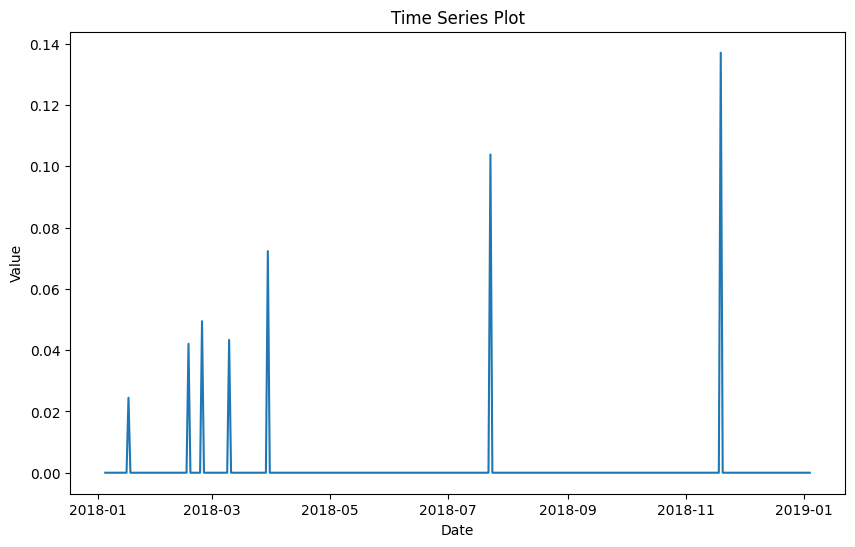

In [43]:
import matplotlib.pyplot as plt
# Plotting a simple line plot as an alternative approach
plt.figure(figsize=(10,6))
plt.plot(return_tearsheet.index, return_tearsheet)  # Replace 'your_column_name' with the relevant column
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()

In [44]:
return_tearsheet

Date
2018-01-05    0.0
2018-01-06    0.0
2018-01-07    0.0
2018-01-08    0.0
2018-01-09    0.0
             ... 
2018-12-31    0.0
2019-01-01    0.0
2019-01-02    0.0
2019-01-03    0.0
2019-01-04    0.0
Freq: D, Length: 365, dtype: float64

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Pair Created (BTC-USD, ETH-USD)
[Train start (2018-01-05) End train (2018-10-04), Full start (2018-01-05) End full (2019-01-04)]
<bound method PairStrategy.is_valid_pair of Pair [ETH-USD, BTC-USD]
	Window: [Train start (2018-01-05) End train (2018-10-04), Full start (2018-01-05) End full (2019-01-04)]
	p-value: 7.848648878283375e-11
	Pair eligible: True>


Start date,2018-01-05
End date,2019-01-03
Total months,17
,Backtest
Annual return,36.852%
Cumulative returns,57.329%
Annual volatility,16.847%
Sharpe ratio,1.94
Calmar ratio,NaN
Stability,0.90
Max drawdown,0.0%


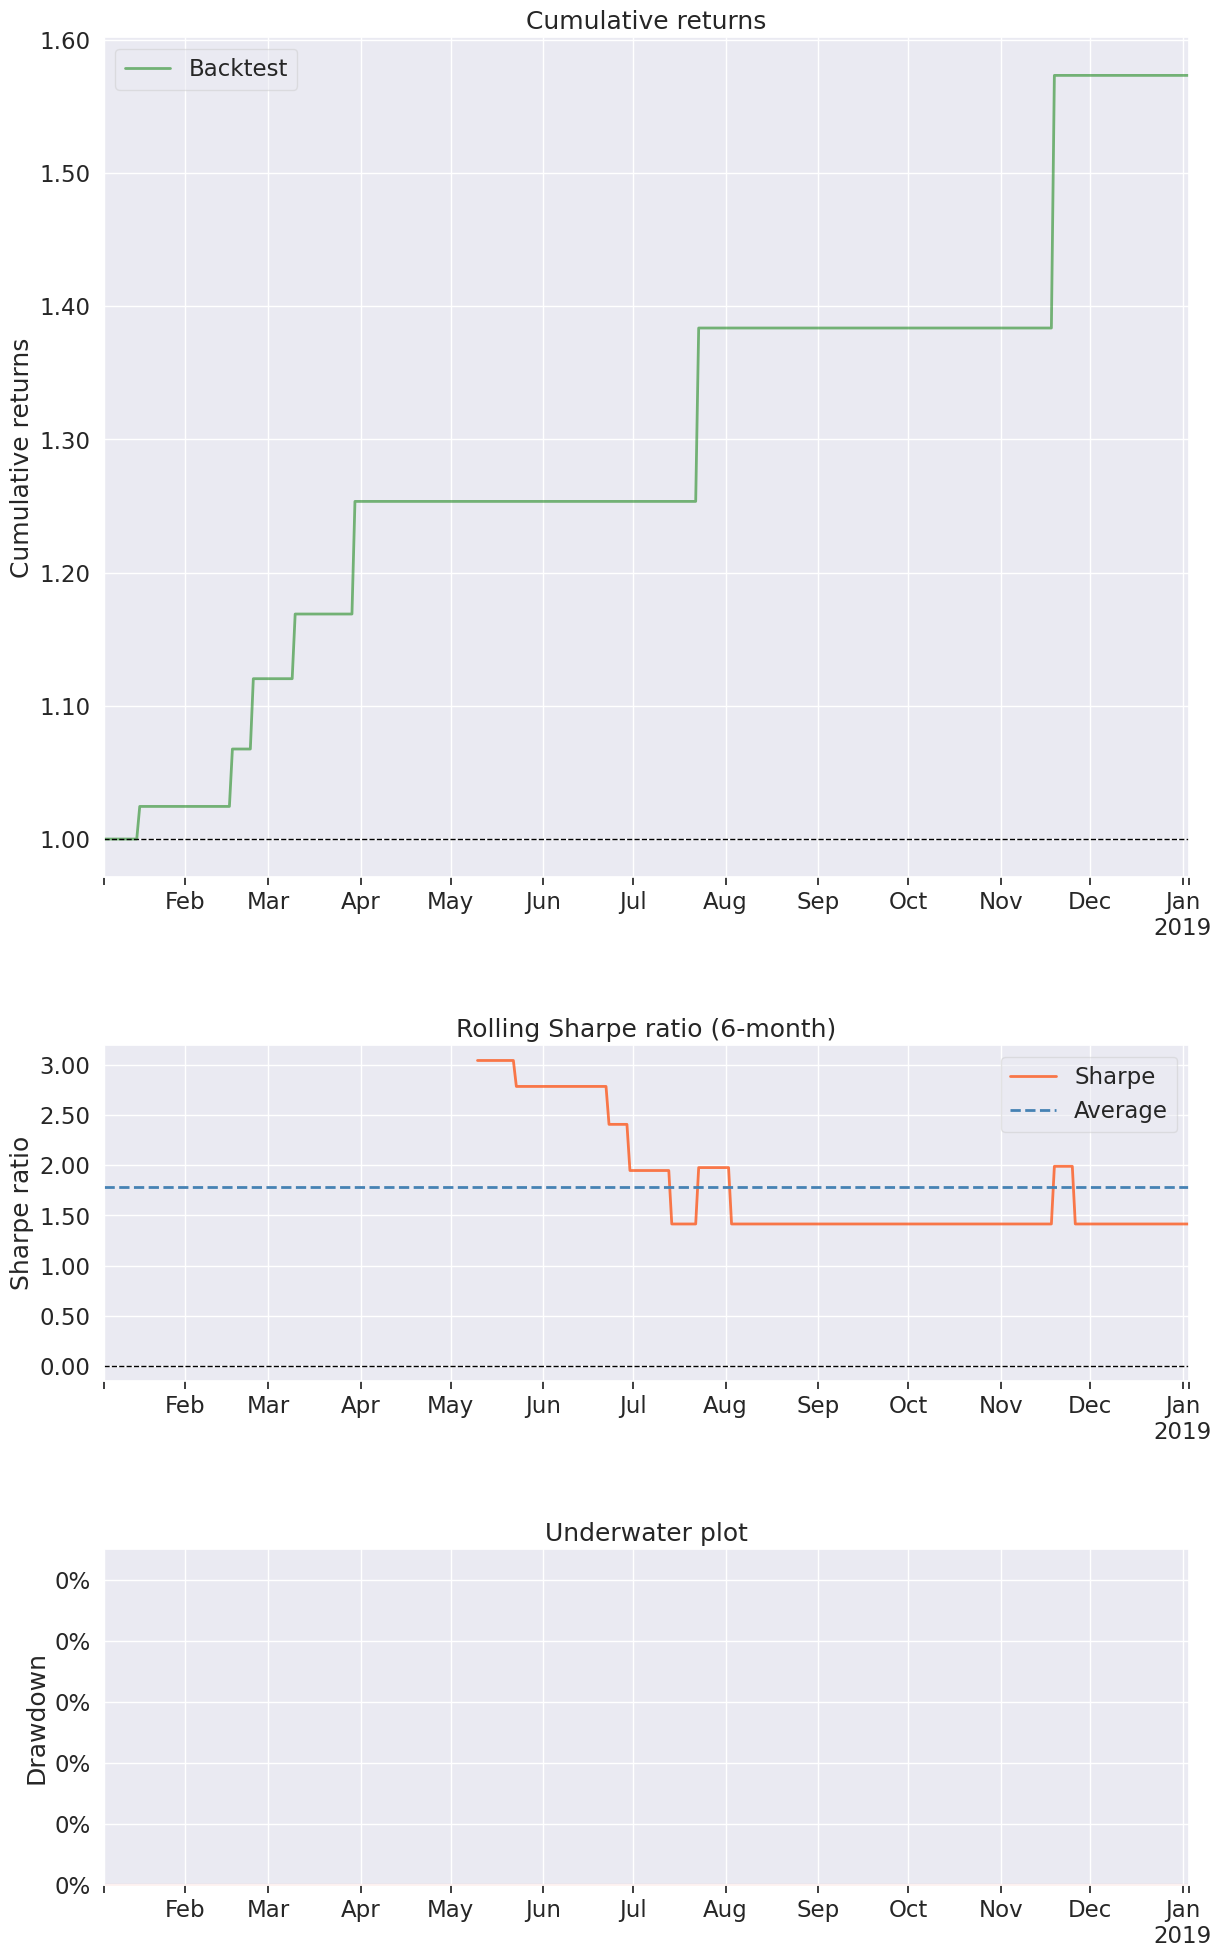

In [57]:
# tickers = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT", "GS", "XOM", "META", "BRK-B", "MSFT", "QQQ"]
tickers = ["BTC-USD", "ETH-USD"]

# tickers = ["MSFT", "QQQ"]

start_date = datetime(2017, 1, 1)
end_date = datetime(2024, 1, 27)
tickData = get_all_adjusted_close_data(start_date, end_date, tickers)

tickData.head(100)


import warnings
warnings.filterwarnings('ignore')
#incorp 
pair = PairStrategy(tickData['BTC-USD'], tickData['BTC-USD'],tickData['ETH-USD'],start_full='2018-01-05',end_full='2019-01-04',start_train='2018-01-05',end_train='2018-10-04', tau_denom=365, trading_fee=0.002)


print(pair.is_valid_pair)
val = pair.generate_trading_signals(z=1.0)
# pair.plot_pair2()

# pair.cum_returns.plot()

df_return = pd.DataFrame(data=pair.returns_series)
df_return['Return'] = df_return.mean(axis=1)
df_return['Cumulative Return'] = df_return['Return'].cumsum()
cum_return = df_return['Cumulative Return']

return_tearsheet = pair.returns_series / 100
# return_tearsheet.column['return']
# df_return.plot()

# cum_return.max()

return_tearsheet
return_tearsheet.name = 'returns'

# Assuming 'return_tearsheet' is your DataFrame
# Convert the index to datetime, if it's not already
return_tearsheet.index = pd.to_datetime(return_tearsheet.index, errors='coerce')

# Drop rows where index is NaT (if any)
return_tearsheet = return_tearsheet[return_tearsheet.index.notna()]

# Check for duplicate indices and handle them if necessary
if return_tearsheet.index.duplicated().any():
    # You might want to aggregate the duplicates or choose to keep one of the duplicates
    # Here's an example of dropping duplicates
    return_tearsheet = return_tearsheet[~return_tearsheet.index.duplicated(keep='first')]

# (Optional) If your analysis requires a specific frequency, you can set it
# For example, for daily frequency:
# return_tearsheet = return_tearsheet.asfreq('D')
return_tearsheet = return_tearsheet[:-1]
return_tearsheet.tail()

return_tearsheet

# Date
# 2018-01-05    0.0000
# 2018-01-06    0.0111
# 2018-01-07    0.1012
# 2018-01-08    0.0811
# 2018-01-09    0.0866
#                ...  
# 2018-12-31   -0.0140
# 2019-01-01    0.0055
# 2019-01-02   -0.0117
# 2019-01-03   -0.0123
# 2019-01-04   -0.0085
# Freq: D, Name: strategy_returns, Length: 365, dtype: float64

# nat_indices = return_tearsheet.index.isna()

# # Filter the DataFrame to only include rows where the index is NaT
# nat_rows = return_tearsheet[nat_indices]

# # 4. Inspect data around the problematic timestamp
# problematic_date = '2019-01-03'
# print(return_tearsheet.loc[problematic_date])


pf.create_simple_tear_sheet(return_tearsheet)

# ret = df_return['Return'] 
# ret.max()

# print(val)
# pair.plot_pair(pair.results)
# pair.plot_results()
# pair.plot_drawdown()

# # print(val)

# results = pair.results

# # results.head(100)

# # #with fees
# strategy_returns_series = results['strategy_returns']

# strategy_returns_series


# pf.create_simple_tear_sheet(strategy_returns_series)


IN Sample

Out sample